importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
data=pd.read_csv('train_Df64byy.csv',index_col=0) # importing the data as a dataframe 
data

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,,,,,,,,,,,,,
1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0
50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0


In [3]:
features = list(data.columns[:-1]) # creating a list of features or variables in the data
features

['City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

In [4]:
#City_Code - Categorical Variable
#Region_Code - Numerical Variable
#Accomodation_Type - Categorical Variable
#Reco_Insurance_Type - Categorical Variable
#Upper_Age - Numerical Variable
#Lower_Age - Numerical Variable
#Is_Spouse - Categorical Variable
#Health Indicator - Categorical Variable
#Holding_Policy_Duration - Numerical Variable (Ordinal data)
#Holding_Policy_Type - Categorical Variable
#Reco_Policy_Cat - Categorical Variable
#Reco_Policy_Premium - Numerical Variable

Feature - City_Code 

In [6]:
def ignore_0(e): # a function to ignore first letter of the string
    return int(e[1:])
c_list = []
for i in list(data['City_Code']): # creating a list of categories in City_Code feature 
    if i in c_list:
        pass
    else:
        c_list.append(i)
c_list.sort(key = ignore_0) # sorting the list 
c_list

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31',
 'C32',
 'C33',
 'C34',
 'C35',
 'C36']

In [7]:
city_code_num=np.zeros((2,36))
for i in [0,1]: # creating an array of responses of customers with respect to feature 
    for j in range(36): # City_Code
        city_code_num[i][j] = data[(data['Response']==i) & (data['City_Code']==c_list[j])].shape[0]
city_code_num

array([[6.765e+03, 5.854e+03, 3.728e+03, 2.782e+03, 1.050e+03, 1.490e+03,
        1.426e+03, 1.369e+03, 1.675e+03, 1.247e+03, 8.680e+02, 6.700e+02,
        7.500e+02, 5.700e+02, 9.330e+02, 8.660e+02, 8.940e+02, 6.070e+02,
        6.910e+02, 7.140e+02, 5.240e+02, 3.970e+02, 4.310e+02, 4.230e+02,
        2.780e+02, 3.910e+02, 2.190e+02, 2.180e+02, 2.960e+02, 4.000e+01,
        1.300e+01, 1.140e+02, 2.150e+02, 9.400e+01, 4.000e+01, 3.100e+01],
       [2.208e+03, 1.893e+03, 1.161e+03, 8.890e+02, 3.140e+02, 4.600e+02,
        4.840e+02, 4.370e+02, 5.100e+02, 3.640e+02, 2.790e+02, 1.980e+02,
        2.550e+02, 1.760e+02, 2.530e+02, 2.690e+02, 2.650e+02, 1.900e+02,
        2.080e+02, 2.120e+02, 1.550e+02, 1.190e+02, 1.560e+02, 1.300e+02,
        8.800e+01, 1.080e+02, 7.600e+01, 6.700e+01, 9.100e+01, 1.800e+01,
        2.000e+00, 4.600e+01, 7.100e+01, 3.600e+01, 1.600e+01, 5.000e+00]])

In [8]:
i_n_rati0 = city_code_num[1]/city_code_num[0]
i_n_rati0

array([0.32638581, 0.32336864, 0.31142704, 0.31955428, 0.29904762,
       0.30872483, 0.33941094, 0.3192111 , 0.30447761, 0.29190056,
       0.32142857, 0.29552239, 0.34      , 0.30877193, 0.27116827,
       0.31062356, 0.29642058, 0.31301483, 0.30101302, 0.29691877,
       0.29580153, 0.29974811, 0.36194896, 0.30732861, 0.31654676,
       0.27621483, 0.34703196, 0.30733945, 0.30743243, 0.45      ,
       0.15384615, 0.40350877, 0.33023256, 0.38297872, 0.4       ,
       0.16129032])

In [9]:
city_dict={'City_Code':c_list,'Not Interested':city_code_num[0],'Interested':city_code_num[1],'i_n_rati0':i_n_rati0}
# a data frame of number of customers were interested or not interested with respect to the feature City_Code
city_code_data=pd.DataFrame(city_dict)
city_code_data.set_index('City_Code') 

,Not Interested,Interested,i_n_rati0
City_Code,,,
C1,6765.0,2208.0,0.326386
C2,5854.0,1893.0,0.323369
C3,3728.0,1161.0,0.311427
C4,2782.0,889.0,0.319554
C5,1050.0,314.0,0.299048
C6,1490.0,460.0,0.308725
C7,1426.0,484.0,0.339411
C8,1369.0,437.0,0.319211
C9,1675.0,510.0,0.304478


i_n_ratio is defined as ratio of interrested customers and not interested customers. the higher the value of i_n_ratio for a respective city_code the higher are the chances of a customer being interested in insurance from that city_code

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5]


Text(0.5, 0, 'city_code')

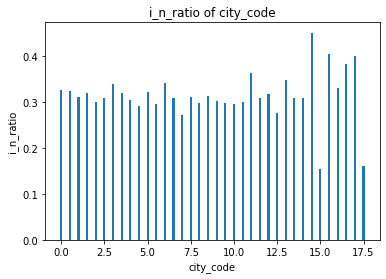

In [10]:
bar_x=[]
for i in range(i_n_rati0.shape[0]):
    bar_x.append((i/2))
print(bar_x)
# making bar plot of i_n_ratio's of different categories of feature city_code
fig1,a1=plt.subplots() 
a1.bar(bar_x,i_n_rati0,width=0.12)
a1.set_title("i_n_ratio of city_code")
a1.set_ylabel('i_n_ratio')
a1.set_xlabel('city_code')

the i_n_ratio of different categories have very difference with an exception for the city_codes ranging from C28-C36

feature - Region_Code

Text(0.5, 1.0, 'Region code')

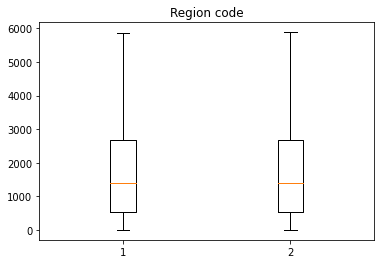

In [11]:
# creating box plots of the for feature region_code 
fig2,a2=plt.subplots()
a2.boxplot([data[data['Response']==0]['Region_Code'],data[data['Response']==1]['Region_Code']],showfliers=False)
a2.set_title('Region code')

1 - not interested
2 - interested

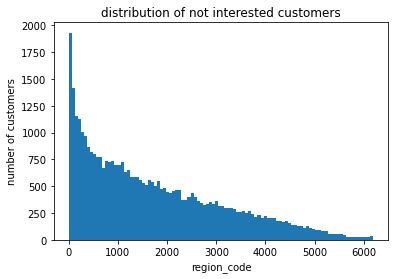

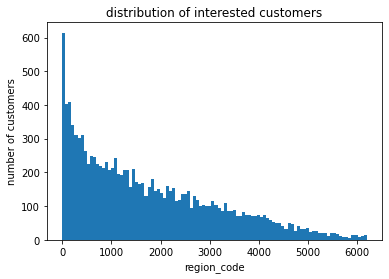

In [12]:
#hist diagram of the not interested customers with respect to region code
fig3,a3=plt.subplots() 
a3.hist([data[data['Response']==0]['Region_Code']],bins=100)
a3.set_title('distribution of not interested customers')
a3.set_xlabel('region_code')
a3.set_ylabel('number of customers')
#hist diagram of the interested customers with respect to region code
fig4,a4=plt.subplots() 
a4.hist([data[data['Response']==1]['Region_Code']],bins=100)
a4.set_title('distribution of interested customers')
a4.set_xlabel('region_code')
a4.set_ylabel('number of customers')
plt.show()

the distributions are quite similar and the box plots also do not show any significant difference

Feature - Accomodation_Type (categorical variable - binary)

In [13]:
# Not interested data 
accom_ni=data[data['Response']==0]['Accomodation_Type'].value_counts()
print('Not interested statistics:')
print(accom_ni)
# interested data
accom_i=data[data['Response']==1]['Accomodation_Type'].value_counts()
print('Interested statistics:')
print(accom_i)

Not interested statistics:
Owned     21188
Rented    17485
Name: Accomodation_Type, dtype: int64
Interested statistics:
Owned     6763
Rented    5446
Name: Accomodation_Type, dtype: int64


In [14]:
# creating a dataframe of accomadation data
accom_data=pd.DataFrame([accom_i,accom_ni]).transpose()
accom_data.columns=['interested','not interested']
accom_data['i_n_ratio']=np.array(accom_i)/np.array(accom_ni)
accom_data

,interested,not interested,i_n_ratio
Owned,6763,21188,0.319190
Rented,5446,17485,0.311467


[Text(0, 0, 'Owned'), Text(1, 0, 'Rented')]

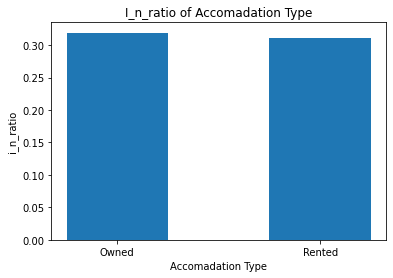

In [15]:
# bar plots of i_n_ratio with respect to accomadation type
i_n_ratio_accom=np.array(accom_i)/np.array(accom_ni)
fig5,a5=plt.subplots() 
a5.bar([0,1],i_n_ratio_accom,width=0.5)
a5.set_title("I_n_ratio of Accomadation Type")
a5.set_ylabel('i_n_ratio')
a5.set_xlabel('Accomadation Type')
a5.set_xticks([0,1])
a5.set_xticklabels(['Owned','Rented'])

Feature - Reco_Insurance_Type

In [16]:
# Not interested data 
Insurance_Type_ni=data[data['Response']==0]['Reco_Insurance_Type'].value_counts()
print('Not interested statistics:')
print(Insurance_Type_ni)
# interested data
Insurance_Type_i=data[data['Response']==1]['Reco_Insurance_Type'].value_counts()
print('Interested statistics:')
print(Insurance_Type_i)

Not interested statistics:
Individual    30896
Joint          7777
Name: Reco_Insurance_Type, dtype: int64
Interested statistics:
Individual    9640
Joint         2569
Name: Reco_Insurance_Type, dtype: int64


In [17]:
# creating a dataframe of Insurance Type
Insurance_Type_data=pd.DataFrame([Insurance_Type_i,Insurance_Type_ni]).transpose()
Insurance_Type_data.columns=['interested','not interested']
Insurance_Type_data['i_n_ratio']=np.array(Insurance_Type_i)/np.array(Insurance_Type_ni)
Insurance_Type_data

,interested,not interested,i_n_ratio
Individual,9640,30896,0.312015
Joint,2569,7777,0.330333


[Text(0, 0, 'Individual'), Text(1, 0, 'Joint')]

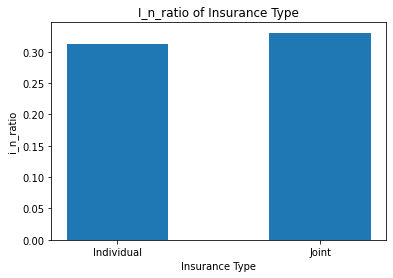

In [18]:
# bar plots of i_n_ratio with respect to Insurance Type
i_n_ratio_itype=np.array(Insurance_Type_i)/np.array(Insurance_Type_ni)
fig6,a6=plt.subplots() 
a6.bar([0,1],i_n_ratio_itype,width=0.5)
a6.set_title("I_n_ratio of Insurance Type")
a6.set_ylabel('i_n_ratio')
a6.set_xlabel('Insurance Type')
a6.set_xticks([0,1])
a6.set_xticklabels(['Individual','Joint'])

Feature - Upper_Age 

Text(0, 0.5, 'upper_age')

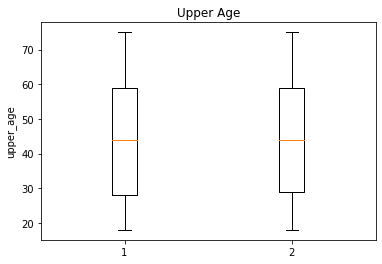

In [25]:
# creating box plots of the for feature upper_age
fig7,a7=plt.subplots()
a7.boxplot([data[data['Response']==0]['Upper_Age'],data[data['Response']==1]['Upper_Age']],showfliers=False)
a7.set_title('Upper Age')
a7.set_ylabel('upper_age')

1 - not interested
2 - interested

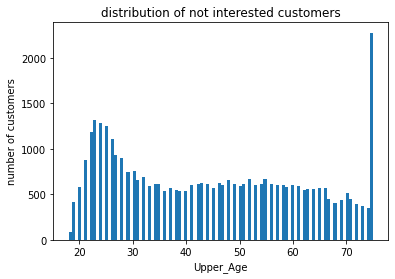

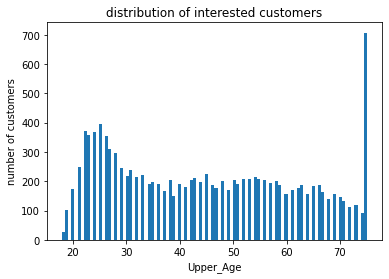

In [26]:
#hist diagram of the not interested customers with respect to upper_age
fig8,a8=plt.subplots() 
a8.hist([data[data['Response']==0]['Upper_Age']],bins=100)
a8.set_title('distribution of not interested customers')
a8.set_xlabel('Upper_Age')
a8.set_ylabel('number of customers')
#hist diagram of the interested customers with respect to upper_age
fig9,a9=plt.subplots() 
a9.hist([data[data['Response']==1]['Upper_Age']],bins=100)
a9.set_title('distribution of interested customers')
a9.set_xlabel('Upper_Age')
a9.set_ylabel('number of customers')
plt.show()

the distributions are quite similar and the box plots also do not show any significant difference

Feature - Lower_Age

Text(0, 0.5, 'Lower_Age')

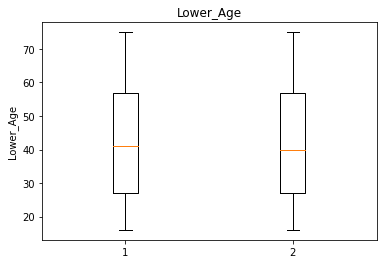

In [28]:
# creating box plots of the for feature Lower_Age
fig10,a10=plt.subplots()
a10.boxplot([data[data['Response']==0]['Lower_Age'],data[data['Response']==1]['Lower_Age']],showfliers=False)
a10.set_title('Lower_Age')
a10.set_ylabel('Lower_Age')

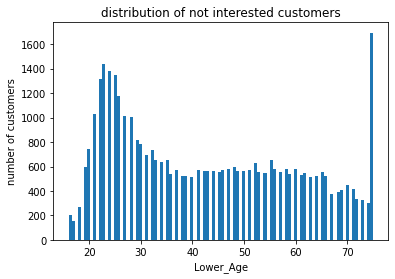

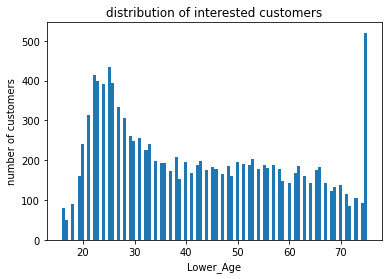

In [29]:
#hist diagram of the not interested customers with respect to Lower_Age
fig11,a11=plt.subplots() 
a11.hist([data[data['Response']==0]['Lower_Age']],bins=100)
a11.set_title('distribution of not interested customers')
a11.set_xlabel('Lower_Age')
a11.set_ylabel('number of customers')
#hist diagram of the interested customers with respect to Lower_Age
fig12,a12=plt.subplots() 
a12.hist([data[data['Response']==1]['Lower_Age']],bins=100)
a12.set_title('distribution of interested customers')
a12.set_xlabel('Lower_Age')
a12.set_ylabel('number of customers')
plt.show()

Feature - Is_Spouse (binary)

In [31]:
# Not interested data 
spouse_ni=data[data['Response']==0]['Is_Spouse'].value_counts()
print('Not interested statistics:')
print(spouse_ni)
# interested data
spouse_i=data[data['Response']==1]['Is_Spouse'].value_counts()
print('Interested statistics:')
print(spouse_i)

Not interested statistics:
No     32303
Yes     6370
Name: Is_Spouse, dtype: int64
Interested statistics:
No     10157
Yes     2052
Name: Is_Spouse, dtype: int64


In [32]:
# creating a dataframe of spouse data
is_spouse_data=pd.DataFrame([spouse_i,spouse_ni]).transpose()
is_spouse_data.columns=['interested','not interested']
is_spouse_data['i_n_ratio']=np.array(spouse_i)/np.array(spouse_ni)
is_spouse_data

,interested,not interested,i_n_ratio
No,10157,32303,0.314429
Yes,2052,6370,0.322135


[Text(0, 0, 'NO'), Text(1, 0, 'YES')]

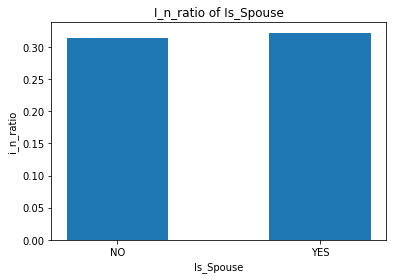

In [33]:
# bar plots of i_n_ratio with respect to is_spouse
i_n_ratio_spouse=np.array(spouse_i)/np.array(spouse_ni)
fig13,a13=plt.subplots() 
a13.bar([0,1],i_n_ratio_spouse,width=0.5)
a13.set_title("I_n_ratio of Is_Spouse")
a13.set_ylabel('i_n_ratio')
a13.set_xlabel('Is_Spouse')
a13.set_xticks([0,1])
a13.set_xticklabels(['NO','YES'])

Feature - Health Indicator

In [42]:
hi_data = data[['Health Indicator','Response']]
# droping na values from the dataframe for visualisation
hi_data.dropna(inplace=True)
hi_data

,Health Indicator,Response
ID,,
1,X1,0
2,X2,0
4,X1,0
5,X2,0
6,X2,1
...,...,...
50878,X3,0
50879,X3,0
50880,X2,0


In [44]:
hi_list = []
for i in list(hi_data['Health Indicator']): # creating a list of categories in Health Indicator feature 
    if i in hi_list:
        pass
    else:
        hi_list.append(i)
hi_list.sort(key = ignore_0) # sorting the list 
hi_list

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']

In [49]:
# creating an array of responses of customers with respect to feature Health Indicator
hi_num=np.zeros((2,9))
for i in [0,1]:
    for j in range(9): 
        hi_num[i][j] = hi_data[(hi_data['Response']==i) & (hi_data['Health Indicator']==hi_list[j])].shape[0]
hi_num

array([[9834., 7841., 5163., 4347., 1319.,  973.,  134.,   60.,   49.],
       [3176., 2491., 1599., 1396.,  408.,  307.,   62.,   18.,   14.]])

In [50]:
i_n_rati0_hi = hi_num[1]/hi_num[0]
i_n_rati0_hi

array([0.32296116, 0.31768907, 0.30970366, 0.32114102, 0.30932525,
       0.31551901, 0.46268657, 0.3       , 0.28571429])

In [58]:
hi_dict={'Health Indicator':hi_list,'Not Interested':hi_num[0],'Interested':hi_num[1],'i_n_rati0':i_n_rati0_hi}
# a data frame of number of customers were interested or not interested with respect to the feature Health Indicator
data_hi=pd.DataFrame(hi_dict)
data_hi.set_index('Health Indicator') 

,Not Interested,Interested,i_n_rati0
Health Indicator,,,
X1,9834.0,3176.0,0.322961
X2,7841.0,2491.0,0.317689
X3,5163.0,1599.0,0.309704
X4,4347.0,1396.0,0.321141
X5,1319.0,408.0,0.309325
X6,973.0,307.0,0.315519
X7,134.0,62.0,0.462687
X8,60.0,18.0,0.300000
X9,49.0,14.0,0.285714


Text(0.5, 0, 'Health Indicator')

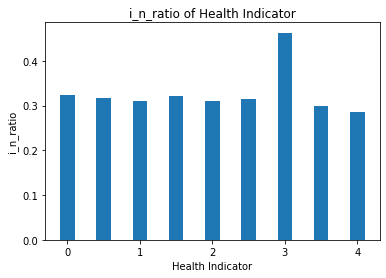

In [59]:
bar_x_hi=[]
for i in range(i_n_rati0_hi.shape[0]):
    bar_x_hi.append((i/2))
# making bar plot of i_n_ratio's of different categories of feature Health Indicator
fig14,a14=plt.subplots() 
a14.bar(bar_x_hi,i_n_rati0_hi,width=0.2)
a14.set_title("i_n_ratio of Health Indicator")
a14.set_ylabel('i_n_ratio')
a14.set_xlabel('Health Indicator')

Feature - Holding_Policy_Duration

In [60]:
data_polcy = data[['Holding_Policy_Duration','Response']]
# droping 'NA' values from the dataframe for visualisation
data_polcy.dropna(inplace=True)
data_polcy

,Holding_Policy_Duration,Response
ID,,
1,14+,0
3,1,1
4,14+,0
5,3,0
6,5,1
...,...,...
50877,2,0
50879,7,0
50880,14+,0


In [67]:
polcy_list = []
for i in list(data_polcy['Holding_Policy_Duration']): # creating a list of categories in Holding_Policy_Duration feature 
    if i in polcy_list:
        pass
    else:
        polcy_list.append(i)
polcy_list.sort(key = lambda x:int(x[:2])) # sorting the list 
polcy_list

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14+',
 '14']

In [70]:
# creating an array of responses of customers with respect to feature Holding_Policy_Duration
polcy_num=np.zeros((2,15))
for i in [0,1]:
    for j in range(15): 
        polcy_num[i][j] = data_polcy[(data_polcy['Response']==i) & (data_polcy['Holding_Policy_Duration']==polcy_list[j])].shape[0]
polcy_num

array([[3502., 3249., 2754., 2104., 1799., 1449., 1222.,  978.,  849.,
         591.,  409.,  383.,  373., 3248.,  351.],
       [ 997., 1011.,  832.,  667.,  563.,  445.,  423.,  338.,  265.,
         222.,  137.,  130.,  138., 1087.,  115.]])

In [71]:
i_n_rati0_p = polcy_num[1]/polcy_num[0]
i_n_rati0_p

array([0.28469446, 0.31117267, 0.30210603, 0.31701521, 0.31295164,
       0.30710835, 0.34615385, 0.34560327, 0.31213192, 0.37563452,
       0.33496333, 0.33942559, 0.36997319, 0.33466749, 0.32763533])

In [72]:
polcy_dict={'Holding_Policy_Duration':polcy_list,'Not Interested':polcy_num[0],'Interested':polcy_num[1],'i_n_rati0':i_n_rati0_p}
# a data frame of number of customers were interested or not interested with respect to the feature Holding_Policy_Duration
polcy_data=pd.DataFrame(polcy_dict)
polcy_data.set_index('Holding_Policy_Duration') 

,Not Interested,Interested,i_n_rati0
Holding_Policy_Duration,,,
1,3502.0,997.0,0.284694
2,3249.0,1011.0,0.311173
3,2754.0,832.0,0.302106
4,2104.0,667.0,0.317015
5,1799.0,563.0,0.312952
6,1449.0,445.0,0.307108
7,1222.0,423.0,0.346154
8,978.0,338.0,0.345603
9,849.0,265.0,0.312132


Text(0.5, 0, 'Holding_Policy_Duration')

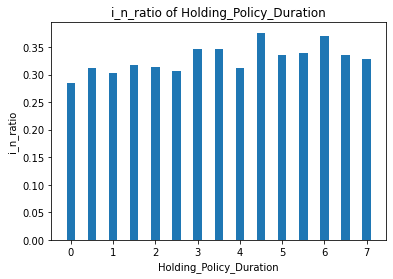

In [73]:
bar_x_p=[]
for i in range(i_n_rati0_p.shape[0]):
    bar_x_p.append((i/2))
# making bar plot of i_n_ratio's of different categories of feature Holding_Policy_Duration
fig15,a15=plt.subplots() 
a15.bar(bar_x_p,i_n_rati0_p,width=0.2)
a15.set_title("i_n_ratio of Holding_Policy_Duration")
a15.set_ylabel('i_n_ratio')
a15.set_xlabel('Holding_Policy_Duration')

Feature - Holding_Policy_Type

In [75]:
data_pt = data[['Holding_Policy_Type','Response']]
# droping 'NA' values from the dataframe for visualisation
data_pt.dropna(inplace=True)
data_pt

,Holding_Policy_Type,Response
ID,,
1,3.0,0
3,1.0,1
4,3.0,0
5,1.0,0
6,1.0,1
...,...,...
50877,1.0,0
50879,3.0,0
50880,1.0,0


In [77]:
pt_list = []
for i in list(data_pt['Holding_Policy_Type']): # creating a list of categories in Holding_Policy_Type feature 
    if i in pt_list:
        pass
    else:
        pt_list.append(i)
pt_list.sort() # sorting the list 
pt_list

[1.0, 2.0, 3.0, 4.0]

In [78]:
# creating an array of responses of customers with respect to feature Holding_Policy_Type
pt_num=np.zeros((2,4))
for i in [0,1]:
    for j in range(4): 
        pt_num[i][j] = data_pt[(data_pt['Response']==i) & (data_pt['Holding_Policy_Type']==pt_list[j])].shape[0]
pt_num

array([[ 6246.,  3815., 10062.,  3138.],
       [ 1927.,  1190.,  3217.,  1036.]])

In [79]:
i_n_rati0_pt = pt_num[1]/pt_num[0]
i_n_rati0_pt

array([0.30851745, 0.31192661, 0.31971775, 0.33014659])

In [86]:
pt_dict={'Holding_Policy_Type':pt_list,'Not Interested':pt_num[0],'Interested':pt_num[1],'i_n_rati0':i_n_rati0_pt}
# a data frame of number of customers were interested or not interested with respect to the feature Holding_Policy_Type
ptype_data=pd.DataFrame(pt_dict)
ptype_data.set_index('Holding_Policy_Type') 

,Not Interested,Interested,i_n_rati0
Holding_Policy_Type,,,
1.0,6246.0,1927.0,0.308517
2.0,3815.0,1190.0,0.311927
3.0,10062.0,3217.0,0.319718
4.0,3138.0,1036.0,0.330147


Text(0.5, 0, 'Holding_Policy_Type')

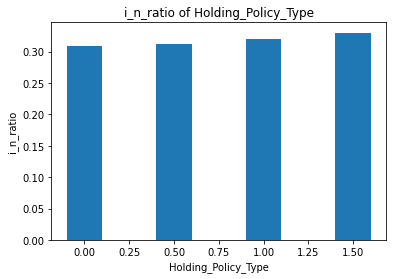

In [81]:
bar_x_pt=[]
for i in range(i_n_rati0_pt.shape[0]):
    bar_x_pt.append((i/2))
# making bar plot of i_n_ratio's of different categories of feature Holding_Policy_Type
fig16,a16=plt.subplots() 
a16.bar(bar_x_pt,i_n_rati0_pt,width=0.2)
a16.set_title("i_n_ratio of Holding_Policy_Type")
a16.set_ylabel('i_n_ratio')
a16.set_xlabel('Holding_Policy_Type')

Feature - Reco_Policy_Cat

In [83]:
data_pc = data[['Reco_Policy_Cat','Response']]
# droping 'NA' values from the dataframe for visualisation
data_pc.dropna(inplace=True)
data_pc

,Reco_Policy_Cat,Response
ID,,
1,22,0
2,22,0
3,19,1
4,19,0
5,16,0
...,...,...
50878,18,0
50879,4,0
50880,12,0


In [85]:
pc_list = []
for i in list(data_pc['Reco_Policy_Cat']): # creating a list of categories in Reco_Policy_Cat feature 
    if i in pc_list:
        pass
    else:
        pc_list.append(i)
pc_list.sort() # sorting the list 
pc_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [88]:
# creating an array of responses of customers with respect to feature Reco_Policy_Cat
pc_num=np.zeros((2,22))
for i in [0,1]:
    for j in range(22): 
        pc_num[i][j] = data_pc[(data_pc['Response']==i) & (data_pc['Reco_Policy_Cat']==pc_list[j])].shape[0]
pc_num

array([[1959., 1663.,  854.,  940.,  714.,  704.,  679.,  567.,  658.,
         634.,  651., 1485., 1316., 1317.,  863., 3171., 2635., 4328.,
        2681., 2367., 4053., 4434.],
       [   8.,  254.,  205.,   75.,  293.,  147.,  155.,  209.,  131.,
         136.,  130.,  683.,  368.,  425.,  752.,  913., 1121., 1225.,
        1027.,  810.,  974., 2168.]])

In [89]:
i_n_rati0_pc = pc_num[1]/pc_num[0]
i_n_rati0_pc

array([0.00408372, 0.15273602, 0.24004684, 0.07978723, 0.41036415,
       0.20880682, 0.22827688, 0.3686067 , 0.19908815, 0.21451104,
       0.19969278, 0.45993266, 0.27963526, 0.32270311, 0.87137891,
       0.28792179, 0.42542694, 0.28304067, 0.38306602, 0.34220532,
       0.24031582, 0.48894903])

In [91]:
pc_dict={'Reco_Policy_Cat':pc_list,'Not Interested':pc_num[0],'Interested':pc_num[1],'i_n_rati0':i_n_rati0_pc}
# a data frame of number of customers were interested or not interested with respect to the feature Reco_Policy_Cat
pcat_data=pd.DataFrame(pc_dict)
pcat_data.set_index('Reco_Policy_Cat') 

,Not Interested,Interested,i_n_rati0
Reco_Policy_Cat,,,
1,1959.0,8.0,0.004084
2,1663.0,254.0,0.152736
3,854.0,205.0,0.240047
4,940.0,75.0,0.079787
5,714.0,293.0,0.410364
6,704.0,147.0,0.208807
7,679.0,155.0,0.228277
8,567.0,209.0,0.368607
9,658.0,131.0,0.199088


Text(0.5, 0, 'Reco_Policy_Cat')

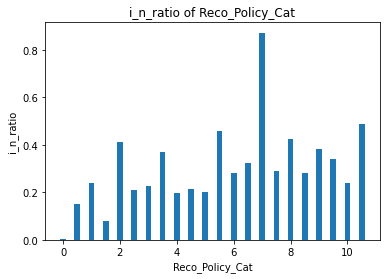

In [92]:
bar_x_pc=[]
for i in range(i_n_rati0_pc.shape[0]):
    bar_x_pc.append((i/2))
# making bar plot of i_n_ratio's of different categories of feature Reco_Policy_Cat
fig17,a17=plt.subplots() 
a17.bar(bar_x_pc,i_n_rati0_pc,width=0.2)
a17.set_title("i_n_ratio of Reco_Policy_Cat")
a17.set_ylabel('i_n_ratio')
a17.set_xlabel('Reco_Policy_Cat')

Feature - Reco_Policy_Premium

Text(0.5, 1.0, 'Reco_Policy_Premium')

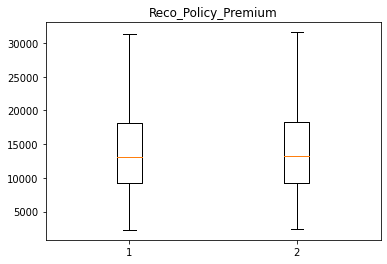

In [93]:
# creating box plots of the for feature Reco_Policy_Premium 
fig18,a18=plt.subplots()
a18.boxplot([data[data['Response']==0]['Reco_Policy_Premium'],data[data['Response']==1]['Reco_Policy_Premium']],showfliers=False)
a18.set_title('Reco_Policy_Premium')

Text(0, 0.5, 'number of customers')

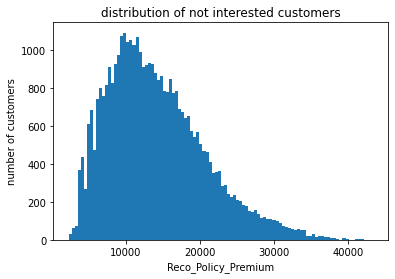

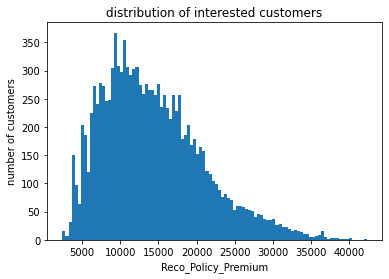

In [96]:
#hist diagram of the not interested customers with respect to Reco_Policy_Premium
fig19,a19=plt.subplots() 
a19.hist([data[data['Response']==0]['Reco_Policy_Premium']],bins=100)
a19.set_title('distribution of not interested customers')
a19.set_xlabel('Reco_Policy_Premium')
a19.set_ylabel('number of customers')
#hist diagram of the interested customers with respect to region code
fig20,a20=plt.subplots() 
a20.hist([data[data['Response']==1]['Reco_Policy_Premium']],bins=100)
a20.set_title('distribution of interested customers')
a20.set_xlabel('Reco_Policy_Premium')
a20.set_ylabel('number of customers')

there no strong patterns observed for not interested customers and interested customers. the graphs did not even show considerable amount of difference between not interested customers data and interested customers data. No strong insites of feature importance could be made through the graphs

finding correlation between features and the outut to find features importance

In [99]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [107]:
chi_scores= chi2(data[['Region_Code','Upper_Age','Lower_Age','Reco_Policy_Premium']],data['Response'])
chi_scores

(array([7.48050133e+01, 2.61216592e+00, 1.57292963e+00, 9.82994282e+03]),
 array([5.19576019e-18, 1.06046834e-01, 2.09782070e-01, 0.00000000e+00]))

In [100]:
features

['City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Upper_Age',
 'Lower_Age',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

In [109]:
f_scores=f_classif(data[['Region_Code','Upper_Age','Lower_Age','Reco_Policy_Premium']],data['Response'])
f_scores

(array([0.06391437, 0.39103086, 0.22411   , 3.21060114]),
 array([0.8004138 , 0.53176084, 0.63592803, 0.07316854]))